In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle, os, math
from parameters import *

linesize = 3
print(lambda_prob)

0.003


intensity 0.02, v num 20, length 5000, mode fpsomr, H_MIN 0.2
95
duplicate number  2.442105263157895
intensity 0.02, v num 20, length 5000, mode least, H_MIN 0.2
93
duplicate number  1.0
intensity 0.02, v num 20, length 5000, mode pso, H_MIN 0.2
94
duplicate number  2.4148936170212765
{'mode pso': [113, 142, 162, 201, 214, 225, 188, 166, 192, 179, 200, 160, 189, 222, 177, 214, 156, 312, 184, 210, 409, 421, 217, 203, 212, 239, 205, 174, 147, 223, 262, 170, 142, 148, 207, 192, 191, 162, 235, 177, 189, 179, 355, 210, 147, 227, 158, 191, 156, 179, 179, 153, 214, 198, 193, 129, 216, 201, 217, 195, 153, 171, 170, 179, 148, 135, 146, 200, 225, 246, 147, 111, 210, 177, 168, 204, 210, 208, 130, 218, 149, 209, 132, 234, 180, 220, 197, 199, 164, 196, 161, 144, 168, 205], 'mode fpsomr': [116, 143, 162, 194, 205, 192, 307, 168, 189, 152, 153, 184, 220, 333, 363, 214, 305, 266, 209, 338, 337, 385, 217, 205, 217, 212, 207, 158, 138, 231, 215, 161, 145, 148, 181, 208, 174, 267, 155, 176, 170, 369, 350

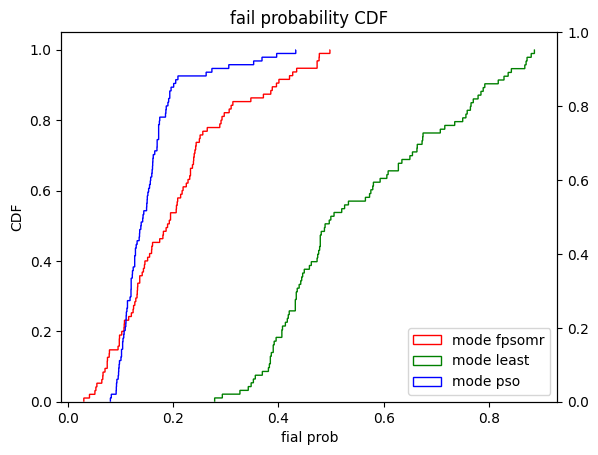

intensity 0.02, v num 20, length 5000, mode fpsomr, H_MIN 0.2
95
duplicate number  2.442105263157895
intensity 0.02, v num 20, length 5000, mode least, H_MIN 0.2
93
duplicate number  1.0
intensity 0.02, v num 20, length 5000, mode pso, H_MIN 0.2
94
duplicate number  2.4148936170212765
{'mode pso': [113.0, 142.0, 164.0, 201.0, 216.66666666666666, 225.0, 188.0, 167.0, 193.5, 179.0, 200.0, 178.0, 261.5, 226.66666666666666, 258.0, 219.66666666666666, 156.0, 332.5, 202.0, 214.0, 409.0, 421.0, 220.66666666666666, 267.0, 214.66666666666666, 294.0, 205.0, 174.0, 147.0, 226.66666666666666, 262.0, 170.0, 142.0, 148.0, 317.3333333333333, 192.0, 191.0, 163.5, 243.66666666666666, 177.0, 189.0, 179.0, 358.0, 210.0, 147.0, 227.0, 158.0, 193.5, 158.5, 179.0, 180.5, 153.0, 218.66666666666666, 200.66666666666666, 295.0, 130.0, 275.0, 205.66666666666666, 220.66666666666666, 195.0, 153.5, 171.0, 172.0, 179.0, 148.0, 135.0, 150.5, 201.33333333333334, 229.0, 254.66666666666666, 147.0, 111.5, 212.66666666666

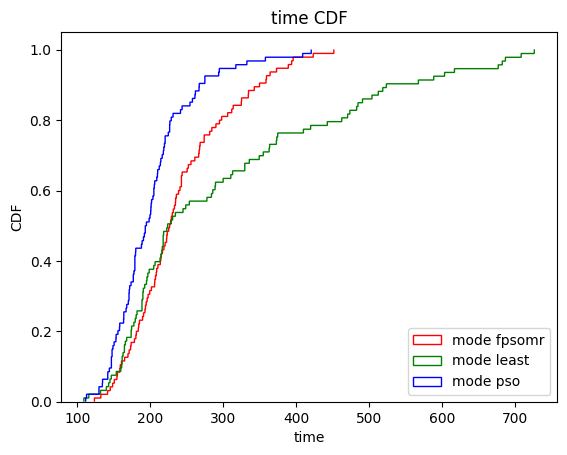

In [3]:
def prob_func(func_total_time):
    return 1 - math.exp(- func_total_time* lambda_prob)


def show_prob_cdf_figure(intensity =0.02, v_num=20, length = 5000, h_min = 0.2, uniform = False):
    # parameter
    intensity_name = 'intensity '+ str(intensity)
    v_num_name = 'v num '+ str(v_num)
    length_name = 'length '+str(length)
    h_min_name = 'H_MIN '+str(h_min)
    
    folder_list = sorted(os.listdir(os.getcwd()))
    fig, ax = plt.subplots()
    ax2 = ax.twinx()
    color_list = ['r', 'g','b', 'C0']
    k = 0
    latency_cdf_list = {'mode pso': [], 'mode fpsomr':[], 'mode least': []}
    fail_prob_cdf_list = {'mode pso': [], 'mode fpsomr':[], 'mode least': []}
    
    for folder_name in folder_list:
        folder_name_temp = folder_name.split(', ')
        if len(folder_name_temp)<4: continue
        if folder_name_temp[0] == intensity_name and folder_name_temp[1] == v_num_name and folder_name_temp[2] == length_name and folder_name_temp[4] == h_min_name:
            print(folder_name)
            finished_tasks_file_name = os.path.abspath('.')+ '/' + folder_name + '/finished tasks.pkl'
            with open(finished_tasks_file_name,'rb') as file1:
                finished_tasks = pickle.loads(file1.read())         
            tk_id_list = []
            tk_time_list = []
            tk_prob_list = []
            tk_reapted_list = []
            # for i, tk in enumerate(all_tasks): # since not all tasks are finished
            #     tk_id_list.append(tk.tid)
            #     tk_time_list.append(1000000)
            for i, tk in enumerate(finished_tasks):
                # print('count%s, tid %s' %(i+1, tk.tid))
                if not tk.tid in tk_id_list:
                    tk_id_list.append(tk.tid)
                    tk_time_list.append(100000)
                    tk_prob_list.append(1)
                    tk_reapted_list.append(0)
            
            print(len(tk_id_list))
            print('duplicate number ',len(finished_tasks)/len(tk_id_list))
            
            for i, f_tk in enumerate(finished_tasks):
                for j, tkid in enumerate(tk_id_list):
                    if f_tk.tid == tkid:
                        tk_reapted_list[j] += 1
                        tk_prob_list[j] *= prob_func(f_tk.total_time)
                        if f_tk.total_time < tk_time_list[j]:
                            tk_time_list[j] = f_tk.total_time
            if uniform:
                for j in range(len(tk_time_list)):
                    tk_prob_list[j] = tk_prob_list[j]**(1/tk_reapted_list[j])
                            
            latency_cdf_list[folder_name_temp[3]] = tk_time_list
            fail_prob_cdf_list[folder_name_temp[3]]= tk_prob_list

            
            ax.hist(np.array(tk_prob_list), bins=1000,cumulative=True, density=True, histtype='step',  color=color_list[k], label=folder_name_temp[3])
            # ax2.hist(np.array(tk_time_list), bins=1000,cumulative=True, density=True, histtype='step',  color=color_list[k], label=folder_name_temp[3])
            k+=1
    print(latency_cdf_list)
    print(fail_prob_cdf_list)               
    # ax.hist(np.array(latency[1]), bins=100,cumulative=True, density=True, histtype='step',  color='r', label='least')
    # ax.hist(np.array(latency[2]), bins=100,cumulative=True, density=True, histtype='step',  color='b', label='base')
    # ax.hist(np.array(latency[3]), bins=100,cumulative=True, density=True, histtype='step',  color='g', label='fpsomr')
    ax.legend(loc='lower right')
    fix_hist_step_vertical_line_at_end(ax)
    # fix_hist_step_vertical_line_at_end(ax2)
    ax.set_title('fail probability CDF')
    ax.set_xlabel('fial prob')
    ax.set_ylabel("CDF")
    plt.show()
def show_latency_cdf_figure(intensity =0.02, v_num=20, length = 5000, h_min = 0.2):
    # parameter
    intensity_name = 'intensity '+ str(intensity)
    v_num_name = 'v num '+ str(v_num)
    length_name = 'length '+str(length)
    h_min_name = 'H_MIN '+str(h_min)
    
    folder_list = sorted(os.listdir(os.getcwd()))
    fig, ax = plt.subplots()
    # ax2 = ax.twinx()
    color_list = ['r', 'g','b', 'C0']
    k = 0
    
    latency_cdf_list = {'mode pso': [], 'mode fpsomr':[], 'mode least': []}
    fail_prob_cdf_list = {'mode pso': [], 'mode fpsomr':[], 'mode least': []}
    
    for folder_name in folder_list:
        folder_name_temp = folder_name.split(', ')
        if len(folder_name_temp)<4: continue
        if folder_name_temp[0] == intensity_name and folder_name_temp[1] == v_num_name and folder_name_temp[2] == length_name and folder_name_temp[4] == h_min_name:
            print(folder_name)
            finished_tasks_file_name = os.path.abspath('.')+ '/' + folder_name + '/finished tasks.pkl'
            with open(finished_tasks_file_name,'rb') as file1:
                finished_tasks = pickle.loads(file1.read())         
            tk_id_list = []
            tk_time_list = []
            tk_prob_list = []
            tk_reapted_list = []
            # for i, tk in enumerate(all_tasks): # since not all tasks are finished
            #     tk_id_list.append(tk.tid)
            #     tk_time_list.append(1000000)
            for i, tk in enumerate(finished_tasks):
                # print('count%s, tid %s' %(i+1, tk.tid))
                if not tk.tid in tk_id_list:
                    tk_id_list.append(tk.tid)
                    tk_time_list.append(0)
                    tk_prob_list.append(1)
                    tk_reapted_list.append(0)
            
            print(len(tk_id_list))
            print('duplicate number ',len(finished_tasks)/len(tk_id_list))
            
            for i, f_tk in enumerate(finished_tasks):
                for j, tkid in enumerate(tk_id_list):
                    if f_tk.tid == tkid:
                        tk_prob_list[j] *= prob_func(f_tk.total_time)
                        # if f_tk.total_time < tk_time_list[j]:
                        tk_time_list[j] += f_tk.total_time
                        tk_reapted_list[j] += 1
            pass
            
            for j in range(len(tk_time_list)):
                tk_time_list[j] = tk_time_list[j]/tk_reapted_list[j]
                            
            latency_cdf_list[folder_name_temp[3]] = tk_time_list
            fail_prob_cdf_list[folder_name_temp[3]]= tk_prob_list

            ax.hist(np.array(tk_time_list), bins=1000,cumulative=True, density=True, histtype='step',  color=color_list[k], label=folder_name_temp[3])
            # ax2.hist(np.array(tk_time_list), bins=1000,cumulative=True, density=True, histtype='step',  color=color_list[k], label=folder_name_temp[3])
            k+=1
    print(latency_cdf_list)
    print(fail_prob_cdf_list)               

    ax.legend(loc='lower right')
    fix_hist_step_vertical_line_at_end(ax)
    # fix_hist_step_vertical_line_at_end(ax2)
    ax.set_title('time CDF')
    ax.set_xlabel('time')
    ax.set_ylabel("CDF")
    plt.show()

intensity =0.02

v_num=20
length = 5000
h_min = 0.2

show_prob_cdf_figure(intensity, v_num, length, h_min)

show_latency_cdf_figure(intensity, v_num, length, h_min)


intensity 0.02, v num 20, length 10000, mode fpsomr, H_MIN 0.2
194
duplicate number  2.4381443298969074
intensity 0.02, v num 20, length 10000, mode least, H_MIN 0.2
194
duplicate number  1.0
intensity 0.02, v num 20, length 10000, mode pso, H_MIN 0.2
193
duplicate number  2.33160621761658
{'mode pso': [113, 142, 162, 201, 214, 225, 188, 166, 192, 179, 200, 160, 189, 222, 177, 214, 156, 312, 184, 210, 409, 421, 217, 203, 212, 239, 205, 174, 147, 223, 262, 170, 142, 148, 207, 192, 191, 162, 235, 177, 189, 179, 355, 210, 147, 227, 158, 191, 156, 179, 179, 153, 214, 198, 193, 129, 216, 201, 217, 195, 153, 171, 170, 179, 148, 135, 146, 200, 225, 246, 147, 111, 210, 177, 168, 204, 210, 208, 130, 218, 149, 209, 132, 234, 180, 220, 197, 199, 164, 196, 161, 144, 168, 205, 221, 159, 176, 138, 184, 148, 136, 178, 197, 120, 147, 175, 174, 195, 178, 173, 153, 199, 210, 209, 150, 153, 152, 167, 211, 205, 231, 206, 208, 337, 190, 233, 148, 182, 209, 204, 159, 184, 159, 169, 188, 134, 215, 138, 183, 

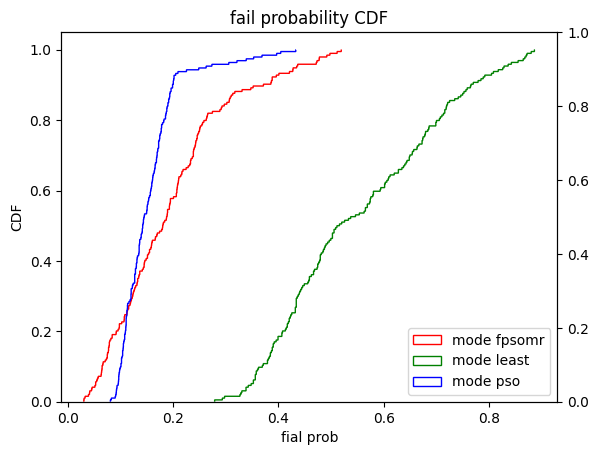

intensity 0.02, v num 20, length 10000, mode fpsomr, H_MIN 0.2
194
duplicate number  2.4381443298969074
intensity 0.02, v num 20, length 10000, mode least, H_MIN 0.2
194
duplicate number  1.0
intensity 0.02, v num 20, length 10000, mode pso, H_MIN 0.2
193
duplicate number  2.33160621761658
{'mode pso': [113.0, 142.0, 164.0, 201.0, 216.66666666666666, 225.0, 188.0, 167.0, 193.5, 179.0, 200.0, 178.0, 261.5, 226.66666666666666, 258.0, 219.66666666666666, 156.0, 332.5, 202.0, 214.0, 409.0, 421.0, 220.66666666666666, 267.0, 214.66666666666666, 294.0, 205.0, 174.0, 147.0, 226.66666666666666, 262.0, 170.0, 142.0, 148.0, 317.3333333333333, 192.0, 191.0, 163.5, 243.66666666666666, 177.0, 189.0, 179.0, 358.0, 210.0, 147.0, 227.0, 158.0, 193.5, 158.5, 179.0, 180.5, 153.0, 218.66666666666666, 200.66666666666666, 295.0, 130.0, 275.0, 205.66666666666666, 220.66666666666666, 195.0, 153.5, 171.0, 172.0, 179.0, 148.0, 135.0, 150.5, 201.33333333333334, 229.0, 254.66666666666666, 147.0, 111.5, 212.666666

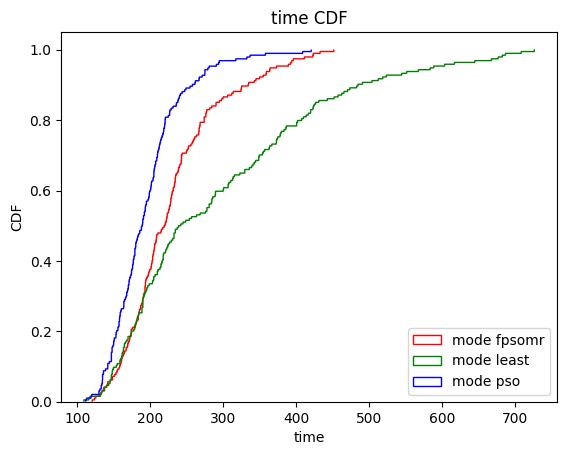

In [9]:
intensity =0.02
v_num=20
length = 10000
h_min = 0.2
show_prob_cdf_figure(intensity, v_num, length, h_min, uniform = False)
show_latency_cdf_figure(intensity, v_num, length, h_min)

In [1]:

def show_h_min_figure(mode):
    # parameter
    folder_list = sorted(os.listdir(os.getcwd()))
    fig, ax = plt.subplots()
    color_list = ['C0', 'C1','C2', 'C3','C4' ,'C5']
    k = 0
    latency_list = {'H_MIN 0.03':[], 'H_MIN 0.04':[], 'H_MIN 0.04':[], 'H_MIN 0.06':[], 'H_MIN 0.07':[],'H_MIN 0.08':[]}
    fail_prob_list = {'H_MIN 0.03':[], 'H_MIN 0.04':[], 'H_MIN 0.04':[], 'H_MIN 0.06':[], 'H_MIN 0.07':[],'H_MIN 0.08':[]}
    for folder_name in folder_list:
        folder_name_temp = folder_name.split(', ')
        if len(folder_name_temp)<4: continue
        # print(folder_name)
        if folder_name_temp[0] == 'intensity 0.03' and folder_name_temp[1] == 'v num 20' and folder_name_temp[2] == 'length 5000' and folder_name_temp[3] == mode:
            print(folder_name)
            finished_tasks_file_name = os.path.abspath('.')+ '/' + folder_name + '/finished tasks.pkl'
            with open(finished_tasks_file_name,'rb') as file1:
                finished_tasks = pickle.loads(file1.read())         
            tk_id_list = []
            tk_time_list = []
            tk_prob_list = []
            # for i, tk in enumerate(all_tasks): # since not all tasks are finished
            #     tk_id_list.append(tk.tid)
            #     tk_time_list.append(1000000)
            for i, tk in enumerate(finished_tasks):
                # print('count%s, tid %s' %(i+1, tk.tid))
                if not tk.tid in tk_id_list:
                    tk_id_list.append(tk.tid)
                    tk_time_list.append(100000)
                    tk_prob_list.append(1)
            
            print(len(tk_id_list))
            print(tk_id_list)
            
            for i, f_tk in enumerate(finished_tasks):
                for j, tkid in enumerate(tk_id_list):
                    if f_tk.tid == tkid:
                        tk_prob_list[j] *= prob_func(f_tk.total_time)
                        if f_tk.total_time < tk_time_list[j]:
                            tk_time_list[j] = f_tk.total_time
                            
            latency_list[folder_name_temp[4]] = tk_time_list
            fail_prob_list[folder_name_temp[4]]= tk_prob_list
            ax.hist(np.array(tk_prob_list), bins=1000,cumulative=True, density=True, histtype='step',  color=color_list[k], label=folder_name_temp[4])
            k+=1
    print(latency_list)
    print(fail_prob_list)               
    # ax.hist(np.array(latency[1]), bins=100,cumulative=True, density=True, histtype='step',  color='r', label='least')
    # ax.hist(np.array(latency[2]), bins=100,cumulative=True, density=True, histtype='step',  color='b', label='base')
    # ax.hist(np.array(latency[3]), bins=100,cumulative=True, density=True, histtype='step',  color='g', label='fpsomr')
    ax.legend(loc='lower right')
    fix_hist_step_vertical_line_at_end(ax)
    ax.set_title('fail probability CDF')
    ax.set_xlabel('fail probability')
    ax.set_ylabel("CDF")
    plt.show()

show_h_min_figure('mode pso')
show_h_min_figure('mode fpsomr')

NameError: name 'os' is not defined

mode fpsomr
51 62 1.2156862745098038
[4, 1, 2, 3, 5, 8, 9, 6, 7, 15, 14, 13, 11, 12, 10, 16, 18, 19, 17, 20, 21, 22, 23, 24, 25, 26, 27, 30, 29, 36, 37, 35, 34, 28, 31, 33, 32, 38, 39, 41, 40, 42, 46, 44, 47, 43, 48, 45, 49, 51, 50]
mode least
51 51 1.0
[1, 2, 3, 4, 8, 9, 6, 7, 5, 10, 11, 12, 13, 14, 15, 16, 19, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 28, 36, 37, 33, 31, 32, 38, 35, 34, 39, 40, 41, 42, 44, 43, 47, 46, 45, 48, 49, 50, 51]
mode pso
51 119 2.3333333333333335
[1, 2, 3, 4, 6, 7, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 28, 30, 31, 33, 32, 36, 34, 37, 35, 38, 39, 40, 41, 42, 44, 43, 46, 45, 47, 48, 49, 51, 50]
mode fpsomr
78 109 1.3974358974358974
[1, 4, 5, 8, 7, 2, 12, 13, 3, 9, 14, 6, 10, 11, 15, 17, 16, 23, 24, 21, 22, 25, 18, 19, 20, 26, 31, 32, 33, 28, 29, 27, 35, 34, 30, 36, 37, 38, 39, 44, 48, 46, 40, 43, 47, 41, 45, 51, 52, 42, 53, 49, 50, 54, 57, 58, 56, 59, 55, 60, 61, 63, 62, 64, 68, 67, 70, 66, 69, 72, 65, 75, 7

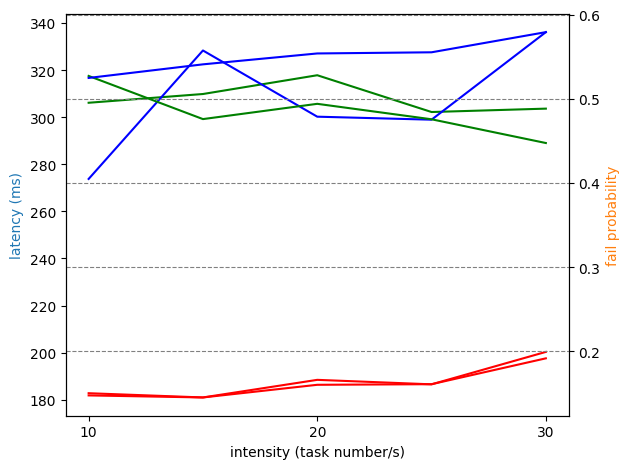

done


In [86]:
# latency and fail probability versus intensity
folder_list = sorted(os.listdir(os.getcwd()))
# fig, ax = plt.subplots()
color_list = ['r', 'g','b', 'C0', 'C1']

fig_size = (8,8)
font_size = 10

intensity = [10,15,20,25,30]
fig, ax = plt.subplots() #figsize=fig_size

ax2 = ax.twinx()
mode_list= ['mode pso', 'mode fpsomr', 'mode least']
latency_list = {'mode pso': [], 'mode fpsomr':[], 'mode least': []}
fail_prob_list = {'mode pso': [], 'mode fpsomr':[], 'mode least': []}
for folder_name in folder_list:
    folder_name_temp = folder_name.split(', ')
    if len(folder_name_temp)<4: continue
    if folder_name_temp[1] == 'v num 20' and folder_name_temp[2] == 'length 5000' \
        and folder_name_temp[4] == 'H_MIN 0.05':
        print(folder_name_temp[3])
        duplicated_num = 0
        
        finished_tasks_file_name = os.path.abspath('.')+ '/' + folder_name + '/finished tasks.pkl'
        all_tasks_file_name = os.path.abspath('.')+ '/' + folder_name + '/all tasks.pkl'
        
        with open(finished_tasks_file_name,'rb') as file1:
            finished_tasks = pickle.loads(file1.read())
            
        with open(all_tasks_file_name,'rb') as file2:
            all_tasks = pickle.loads(file2.read())
        
        
        # for f_tk in finished_tasks:
        #     print('tid %s, vid %s, total_time, %s' %(f_tk.tid, f_tk.vid, f_tk.total_time))
        tk_id_list = []
        tk_time_list = []
        tk_prob_list = []
        # for i, tk in enumerate(all_tasks): # since not all tasks are finished
        #     tk_id_list.append(tk.tid)
        #     tk_time_list.append(1000000)
        for i, tk in enumerate(finished_tasks):
            # print('count%s, tid %s' %(i+1, tk.tid))
            if not tk.tid in tk_id_list:
                tk_id_list.append(tk.tid)
                tk_time_list.append(100000)
                tk_prob_list.append(1)
        
        print(len(tk_id_list), len(finished_tasks), len(finished_tasks)/len(tk_id_list))
        print(tk_id_list)
                
        for i, f_tk in enumerate(finished_tasks):
            for j, tkid in enumerate(tk_id_list):
                if f_tk.tid == tkid:
                    tk_prob_list[j] *= prob_func(f_tk.total_time)
                    if f_tk.total_time < tk_time_list[j]:
                        tk_time_list[j] = f_tk.total_time
                    

        # average_total_time = np.sum(tk_time_list)/ (len(tk_time_list)-1 )
        
        # fail_prob = 1 - math.exp(- average_total_time* lambda_prob)
        # latency_list.append(average_total_time)
        # fail_prob_list.append(fail_prob)
        # print('average total time', average_total_time)
        # print('fail_prob', tk_prob_list)
        # print('time latency', tk_time_list)
        latency_list[folder_name_temp[3]].append(np.sum(tk_time_list)/len(tk_time_list))
        fail_prob_list[folder_name_temp[3]].append(np.sum(tk_prob_list)/len(tk_prob_list))
        # ax.plot(intensity, latency_list, label='latency', color='C0', )
        # ax2.plot(intensity, fail_prob_list, label='fail probability', color='C1', )
print(latency_list)
print(fail_prob_list)
intensity = [10, 15, 20, 25, 30]
ax.plot(intensity, latency_list[mode_list[0]], label='latency', color='r', )
ax.plot(intensity, latency_list[mode_list[1]], label='latency', color='g', )
ax.plot(intensity, latency_list[mode_list[2]], label='latency', color='b', )
ax.set_xticks(np.arange(10, 50, 10))
ax.set_ylabel('latency (ms)', color='C0')

ax2.plot(intensity, fail_prob_list[mode_list[0]], label='latency', color='r', )
ax2.plot(intensity, fail_prob_list[mode_list[1]], label='latency', color='g',)
ax2.plot(intensity, fail_prob_list[mode_list[2]], label='latency', color='b',)
ax2.set_ylabel('fail probability', color='C1')

ax.set_xlabel('intensity (task number/s)')

# plt.xticks(x, calendar.month_name[1:13],color='blue',rotation=60)
plt.tight_layout()
plt.grid(which='both',linestyle='--',axis='both',color='gray')

plt.show()
print('done')


intensity 0.01, v num 20, length 5000, mode fpsomr, H_MIN 0.05
intensity 0.015, v num 20, length 5000, mode fpsomr, H_MIN 0.05
intensity 0.02, v num 20, length 5000, mode fpsomr, H_MIN 0.05
intensity 0.025, v num 20, length 5000, mode fpsomr, H_MIN 0.05
intensity 0.03, v num 20, length 5000, mode fpsomr, H_MIN 0.05
intensity 0.035, v num 20, length 5000, mode fpsomr, H_MIN 0.05
intensity 0.04, v num 20, length 5000, mode fpsomr, H_MIN 0.05
intensity 0.045, v num 20, length 5000, mode fpsomr, H_MIN 0.05
intensity 0.05, v num 20, length 5000, mode fpsomr, H_MIN 0.05
intensity 0.055, v num 20, length 5000, mode fpsomr, H_MIN 0.05
intensity 0.06, v num 20, length 5000, mode fpsomr, H_MIN 0.05
intensity 0.065, v num 20, length 5000, mode fpsomr, H_MIN 0.05
{'mode pso': [], 'mode fpsomr': [306.11764705882354, 309.8333333333333, 317.80645161290323, 302.1858407079646, 303.6222222222222, 310.83660130718954, 309.7158469945355, 337.8767772511848, 369.1012658227848, 360.102766798419, 401.608365019

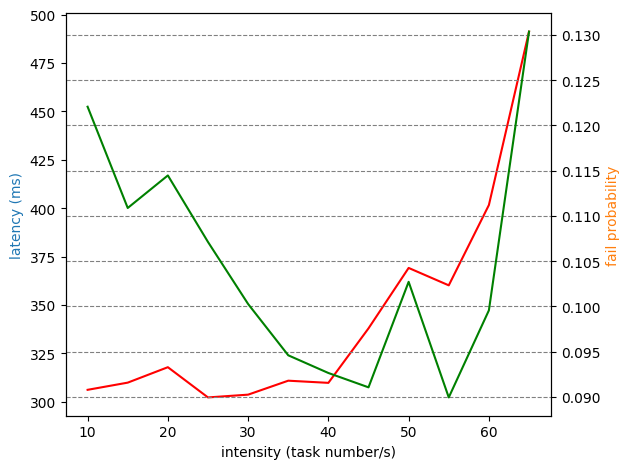

done


In [61]:
# latency and fail probability versus intensity
folder_list = sorted(os.listdir(os.getcwd()))
# fig, ax = plt.subplots()
color_list = ['r', 'g','b', 'C0', 'C1']

fig_size = (8,8)
font_size = 10

intensity = [30 ,40, 50, 70]
fig, ax = plt.subplots() #figsize=fig_size

ax2 = ax.twinx()
mode_list= ['mode pso', 'mode fpsomr', 'mode least']
latency_list = {'mode pso': [], 'mode fpsomr':[], 'mode least': []}
fail_prob_list = {'mode pso': [], 'mode fpsomr':[], 'mode least': []}
for folder_name in folder_list:
    folder_name_temp = folder_name.split(', ')
    if len(folder_name_temp)<4: continue
    if folder_name_temp[1] == 'v num 20' and folder_name_temp[2] == 'length 5000' \
        and folder_name_temp[3] == 'mode fpsomr' and folder_name_temp[4] == 'H_MIN 0.05':
        print(folder_name)
        duplicated_num = 0
        
        finished_tasks_file_name = os.path.abspath('.')+ '/' + folder_name + '/finished tasks.pkl'
        all_tasks_file_name = os.path.abspath('.')+ '/' + folder_name + '/all tasks.pkl'
        
        with open(finished_tasks_file_name,'rb') as file1:
            finished_tasks = pickle.loads(file1.read())
            
        with open(all_tasks_file_name,'rb') as file2:
            all_tasks = pickle.loads(file2.read())
        
        
        # for f_tk in finished_tasks:
        #     print('tid %s, vid %s, total_time, %s' %(f_tk.tid, f_tk.vid, f_tk.total_time))
        tk_id_list = []
        tk_time_list = []
        tk_prob_list = []
        # for i, tk in enumerate(all_tasks): # since not all tasks are finished
        #     tk_id_list.append(tk.tid)
        #     tk_time_list.append(1000000)
        for i, tk in enumerate(finished_tasks):
            # print('count%s, tid %s' %(i+1, tk.tid))
            if not tk.tid in tk_id_list:
                tk_id_list.append(tk.tid)
                tk_time_list.append(100000)
                tk_prob_list.append(1)
        
        # print(len(tk_id_list), len(finished_tasks), len(finished_tasks)/len(tk_id_list))
        # print(tk_id_list)
                
        for i, f_tk in enumerate(finished_tasks):
            for j, tkid in enumerate(tk_id_list):
                if f_tk.tid == tkid:
                    tk_prob_list[j] *= prob_func(f_tk.total_time)
                    if f_tk.total_time < tk_time_list[j]:
                        tk_time_list[j] = f_tk.total_time
                    

        # average_total_time = np.sum(tk_time_list)/ (len(tk_time_list)-1 )
        
        # fail_prob = 1 - math.exp(- average_total_time* lambda_prob)
        # latency_list.append(average_total_time)
        # fail_prob_list.append(fail_prob)
        # print('average total time', average_total_time)
        # print('fail_prob', tk_prob_list)
        # print('time latency', tk_time_list)
        latency_list[folder_name_temp[3]].append(np.sum(tk_time_list)/len(tk_time_list))
        fail_prob_list[folder_name_temp[3]].append(np.sum(tk_prob_list)/len(tk_prob_list))
        # ax.plot(intensity, latency_list, label='latency', color='C0', )
        # ax2.plot(intensity, fail_prob_list, label='fail probability', color='C1', )
print(latency_list)
print(fail_prob_list)
intensity = [10, 15, 20, 25, 30, 35, 40,45,50,55,60,65]
# ax.plot(intensity, latency_list[mode_list[0]], label='latency', color='r', )
ax.plot(intensity, latency_list['mode fpsomr'], label='latency', color='r', )
# ax.plot(intensity, latency_list[mode_list[2]], label='latency', color='b', )
ax.set_xticks(np.arange(10, 70, 10))
ax.set_ylabel('latency (ms)', color='C0')

# ax2.plot(intensity, fail_prob_list[mode_list[0]], label='latency', color='r', )
ax2.plot(intensity, fail_prob_list['mode fpsomr'], label='latency', color='g',)
# ax2.plot(intensity, fail_prob_list[mode_list[2]], label='latency', color='b',)
ax2.set_ylabel('fail probability', color='C1')

ax.set_xlabel('intensity (task number/s)')

# plt.xticks(x, calendar.month_name[1:13],color='blue',rotation=60)
plt.tight_layout()
plt.grid(which='both',linestyle='--',axis='both',color='gray')

plt.show()
print('done')


intensity 0.01, v num 20, length 5000, mode pso, H_MIN 0.05
[0.20208572328641208, 0.09761439167284777, 0.19392454438358214, 0.13404894767474854, 0.13686078806977753, 0.13338355306561656, 0.15960378254854646, 0.1396864285783931, 0.1872945793666019, 0.10002854400130763, 0.1510081212806491, 0.1410865841976553, 0.07899118248073204, 0.1488380544607068, 0.06988372196404462, 0.12854704446253087, 0.0766426933073119, 0.08102978935028535, 0.1653782968558806, 0.16104426506753555, 0.16103887679236994, 0.10211486764224871, 0.1292244440643145, 0.12047281005526361, 0.1726409795169047, 0.221439825739809, 0.08685601008074777, 0.1149203550426163, 0.22744227716540646, 0.10846253159447018, 0.12920138577533513, 0.10824711859589746, 0.13548638693739806, 0.10585992241196154, 0.24140200638480916, 0.34574350088196215, 0.48579950754933077, 0.11223915163509486, 0.11714866618212408, 0.08071974367674249, 0.169730273333137, 0.08105649354045381, 0.12992859406180515, 0.08817951000136343, 0.10692462090178488, 0.270914

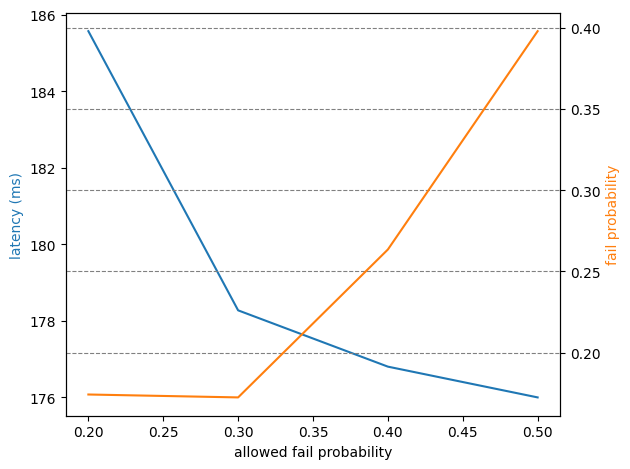

done


In [83]:
# latency and fail probability versus h_min

folder_list = sorted(os.listdir(os.getcwd()))
# fig, ax = plt.subplots()
color_list = ['r', 'g','b', 'C0', 'C1','C2','C3']
i = 0
latency_list = []
fail_prob_list = []
for folder_name in folder_list:
    folder_name_temp = folder_name.split(', ')
    
    if folder_name_temp[0] == 'intensity 0.01' and folder_name_temp[1] == 'v num 20' and folder_name_temp[2] == 'length 5000' and folder_name_temp[3] == 'mode pso':
        
        print(folder_name)
        folder_name_temp = folder_name.split(', ')
        
        finished_tasks_file_name = os.path.abspath('.')+ '/' + folder_name + '/finished tasks.pkl'
        all_tasks_file_name = os.path.abspath('.')+ '/' + folder_name + '/all tasks.pkl'
        
        with open(finished_tasks_file_name,'rb') as file1:
            finished_tasks = pickle.loads(file1.read())
            
        with open(all_tasks_file_name,'rb') as file2:
            all_tasks = pickle.loads(file2.read())
        
        tk_id_list = []
        tk_time_list = []
        tk_prob_list = []
        # for i, tk in enumerate(all_tasks): # since not all tasks are finished
        #     tk_id_list.append(tk.tid)
        #     tk_time_list.append(1000000)
        for i, tk in enumerate(finished_tasks):
            # print('count%s, tid %s' %(i+1, tk.tid))
            if not tk.tid in tk_id_list:
                tk_id_list.append(tk.tid)
                tk_time_list.append(100000)
                tk_prob_list.append(1)
        
        # print(len(tk_id_list), len(finished_tasks), len(finished_tasks)/len(tk_id_list))
        # print(tk_id_list)
                
        for i, f_tk in enumerate(finished_tasks):
            for j, tkid in enumerate(tk_id_list):
                if f_tk.tid == tkid:
                    tk_prob_list[j] *= prob_func(f_tk.total_time)
                    if f_tk.total_time < tk_time_list[j]:
                        tk_time_list[j] = f_tk.total_time
        print(tk_prob_list)
        # print(tk_time_list)
        print(np.sum(tk_time_list)/len(tk_time_list))
        print(np.sum(tk_prob_list)/len(tk_prob_list))
        # fail_prob = 1 - math.exp(- average_total_time* lambda_prob)
        latency_list.append(np.sum(tk_time_list)/len(tk_time_list))
        fail_prob_list.append(np.sum(tk_prob_list)/len(tk_prob_list))

fig_size = (8,8)
font_size = 10

print(latency_list)
print(fail_prob_list)

h_min_list = [0.2,0.3,0.4,0.5]
fig, ax = plt.subplots() #figsize=fig_size

ax.plot(h_min_list, latency_list[1:], label='latency', color='C0')
# ax.set_xticks(np.arange(0.05, 0.3, 0.05))
ax.set_ylabel('latency (ms)', color='C0')

ax2 = ax.twinx()
ax2.plot(h_min_list, fail_prob_list[1:], label='fail probability', color='C1')
ax2.set_ylabel('fail probability', color='C1')

ax.set_xlabel('allowed fail probability')

# plt.xticks(x, calendar.month_name[1:13],color='blue',rotation=60)
plt.tight_layout()
plt.grid(which='both',linestyle='--',axis='both',color='gray')

plt.show()
print('done')

In [69]:
np.exp(-0.6)**2

0.5488116360940264

intensity 0.05, length 10000, mode fpsomr, H_MIN 0.1
average time latency 299.7226277372263
intensity 0.05, length 10000, mode fpsomr, H_MIN 0.15
average time latency 299.7226277372263
intensity 0.05, length 10000, mode least, H_MIN 0.1
average time latency 460.7987927565392
intensity 0.05, length 10000, mode least, H_MIN 0.15
average time latency 460.7987927565392
intensity 0.05, length 10000, mode least, kkt False, H_MIN 0.1
average time latency 460.7987927565392


IndexError: list index out of range

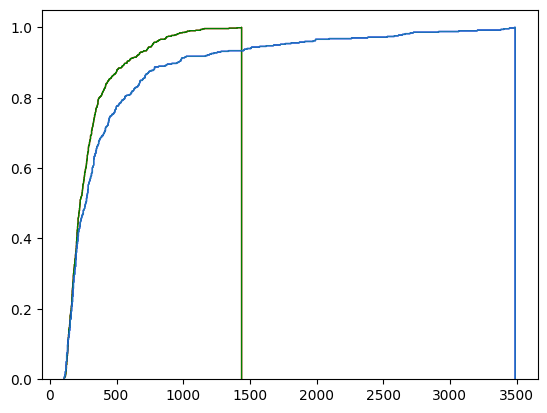

In [127]:
parameter = 'intensity 0.05, length 10000'
show_latency_figure(parameter)
show_prob_cdf_figure(parameter)

intensity 0.05, length 10000, mode fpsomr
average time latency 299.7226277372263
intensity 0.05, length 10000, mode least
average time latency 460.7987927565392
intensity 0.05, length 10000, mode pso
average time latency 177.39633027522936


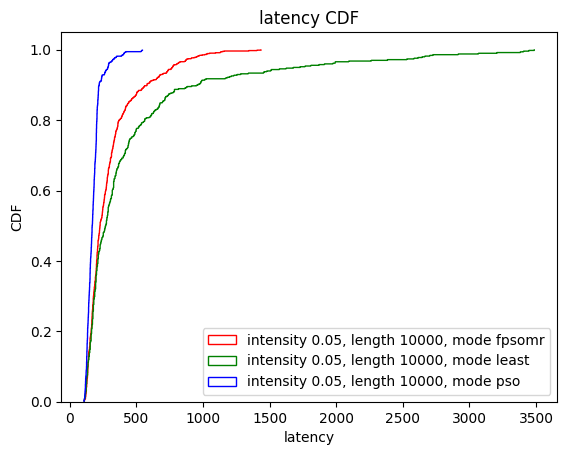

intensity 0.05, length 10000, mode fpsomr
intensity 0.05, length 10000, mode least
intensity 0.05, length 10000, mode pso


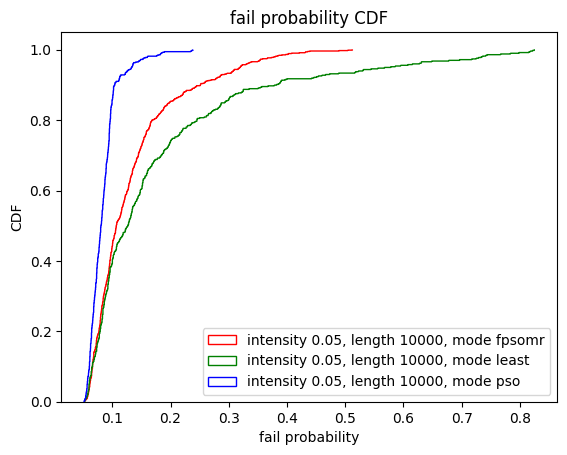

In [84]:
parameter = 'intensity 0.05, length 10000'
show_latency_figure(parameter)
show_prob_cdf_figure(parameter)

intensity 0.05, length 60000, mode fpsomr
average time latency 315.3450861195542
intensity 0.05, length 60000, mode least
average time latency 502.6866981769075
intensity 0.05, length 60000, mode pso
average time latency 178.8898623279099


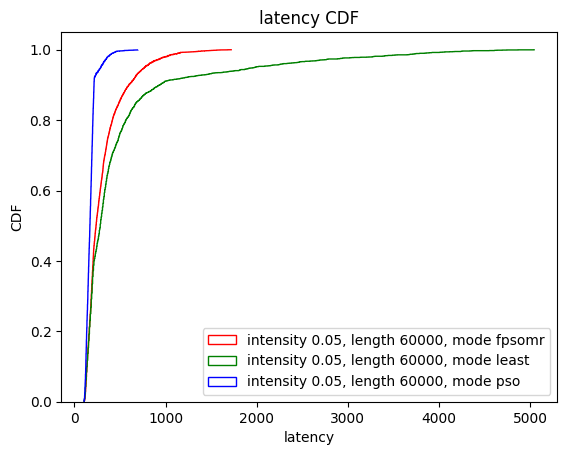

intensity 0.05, length 60000, mode fpsomr
intensity 0.05, length 60000, mode least
intensity 0.05, length 60000, mode pso


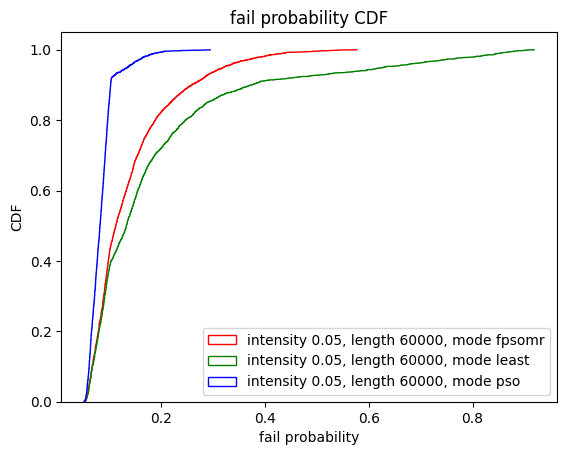

In [85]:
parameter = 'intensity 0.05, length 60000'
show_latency_figure(parameter)
show_prob_cdf_figure(parameter)

intensity 0.06, length 10000, mode fpsomr
average time latency 477.9613152804642
intensity 0.06, length 10000, mode least
average time latency 577.3666666666667
intensity 0.06, length 10000, mode pso
average time latency 316.21714285714285


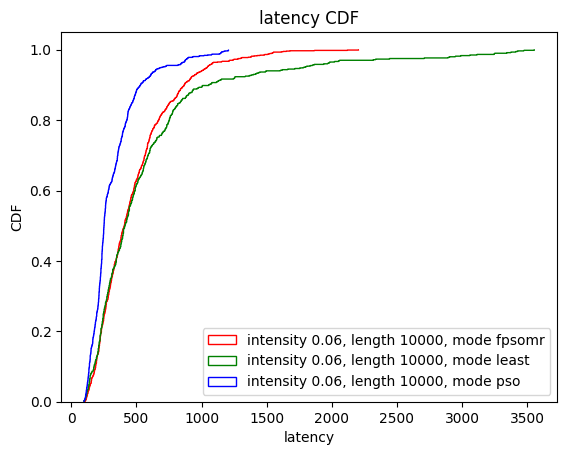

intensity 0.06, length 10000, mode fpsomr
intensity 0.06, length 10000, mode least
intensity 0.06, length 10000, mode pso


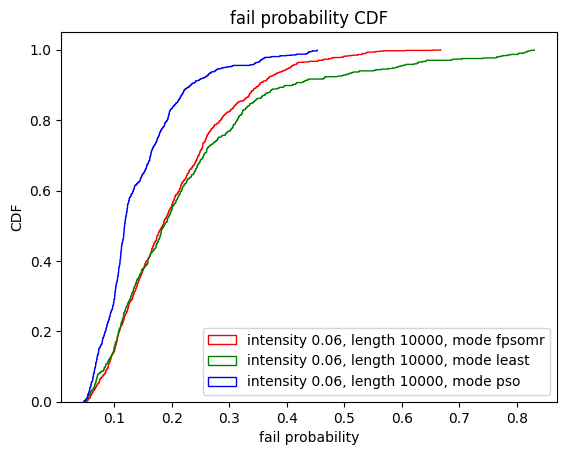

In [86]:
parameter = 'intensity 0.06, length 10000'
show_latency_figure(parameter)
show_prob_cdf_figure(parameter)